#### Zoher Ghadyali, Nitya Dhanushkodi, and Cynthia Chen
####Signals and Systems 2015 Final Project: Haar Wavelet Transform
####Explaining the Haar Wavelet Transform in 1 Dimension

This iPython notebook contains a one-dimensional implementation of the Haar Wavelet Transform. We start of with a simple sine wave at a frequency of 440 Hz over a period of T, which is 1/440 s. We then apply the Haar Wavelet Transform and approximate the sine wave at one level of detail. We are claiming that as we increase the levels of detail, our approximation of the sine wave approaches the original wave. We then approximate the sine wave with two levels of detail to prove this claim.

In [19]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2
import math
import numpy as np
from IPython.display import Image

%precision 3
%matplotlib inline

PI2 = 2 * math.pi
i = complex(0, 1)

In the cell below, we create the original sine wave over the period T. The Haar Wavelet Transform relies on divisions of 2 in order to form levels of detail so I had to manipulate the framerate to produce an even length of the ys matrix for this wave object.

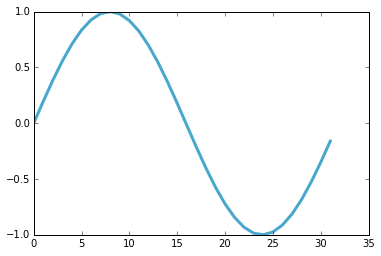

In [8]:
signal = thinkdsp.Sinusoid(freq=440)
wave = signal.make_wave(start=0, duration=1/440, framerate=14000)
thinkplot.plot(wave.ys)

In the section below, we make an approximation of the sine wave, $f_1(t)$, without any level of detail just by averaging the entire wave. In order to add one level of detail, we divide our sine wave into 2 segments, over the interval from 0 to $\frac{T}{2}$ and over the interval $\frac{T}{2}$ to T. We then take the average of these 2 segments. We label this function as $f_2(t)$. The Haar Wavelet Transform asserts the equality below:

$$(f_2 - f_1)(t) = h \times \psi(t/T)$$

where h is the difference between the average over the interval 0 to $\frac{T}{2}$ and the average of the total segment. Because of the way averages work, the magnitude of h is the same as the difference between the average over the interval $\frac{T}{2}$ to T and the total average. Below is a depiction of this process.

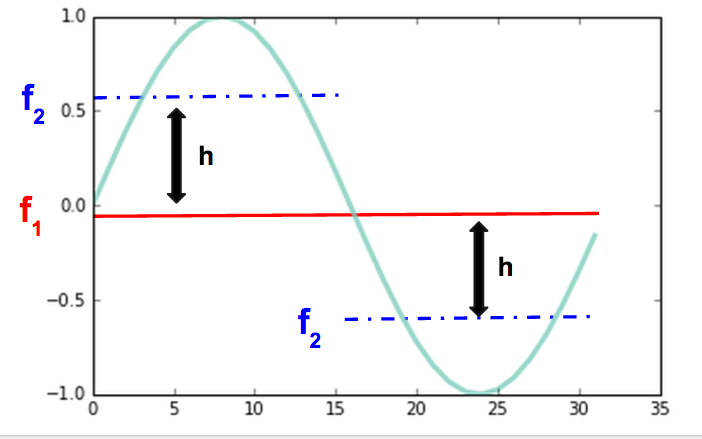

In [23]:
Image(filename='HWT_1.png')

This next section plots the left-hand side of the equality, $(f_2 - f_1)(t)$

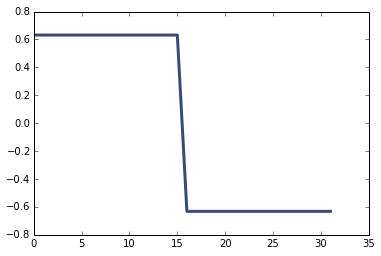

In [13]:
f1 = np.mean(wave.ys)  #f1(t)
ys1 = wave.ys[0:len(wave.ys)/2]
ys2 = wave.ys[len(wave.ys)/2:len(wave.ys)]
f21 = np.mean(ys1)  #f2(t)
f22 = np.mean(ys2)

h = f21 - f1
h2 = f22 - f1

left = np.concatenate([h*np.ones(len(ys1)),  h2*np.ones(len(ys2))])
thinkplot.plot(left) #f2(t) - f1(t)

In order to prove the equality stated above, we then determine the left-hand side of the equality. We take the h which we have determined as the difference between the average of the first segment and the total average which is the same as h2 above in magnitude and we multiply it by our $\psi(t)$ function. The $\psi(t)$ function is 1 over the interval from 0 to $\frac{1}{2}$ and -1 over the interval $\frac{1}{2}$ to 1 and is depicted below.

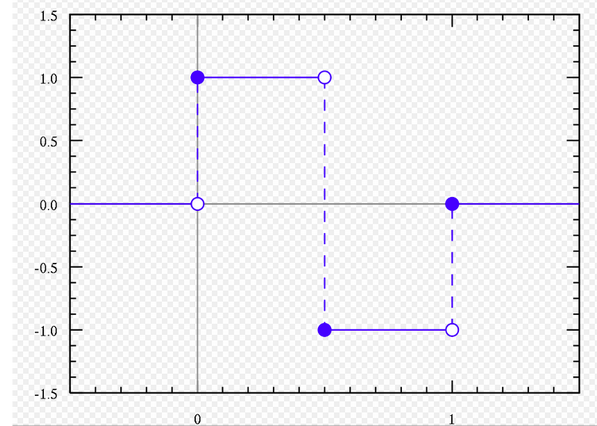

In [25]:
Image(filename='HWT_2.png')

We take this $\psi(t)$ function and dilate it, which means we spread it out over the interval of T. Below is the plot of the left-hand side of the equality. Since these plots are the same, we have proved the equality.

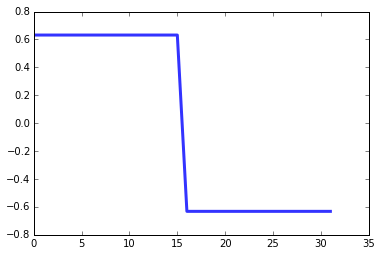

In [12]:
psi = np.concatenate([np.ones(len(wave.ys)/2), -np.ones(len(wave.ys)/2)])
right = h*psi
thinkplot.plot(right)

In order to now determine what the approximation of the sine wave is, we just add the original average over the entire segment, $f_1(t)$ to the right-hand side of the equality. The average of this sine wave is 0 so this approximation is the same as the previous plots. Qualitatively this makes sense; at one level of detail, the approximation of the sine wave is the average of both segments, 0 to $\frac{T}{2}$ and $\frac{T}{2}$ to T.

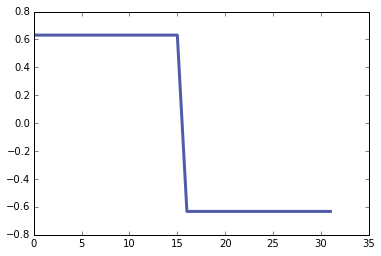

In [14]:
approx1 = right + f1
thinkplot.plot(approx1)

Now we will add a second level of detail to see if we can better approximate the sine wave. In the code below, we again generate a sine wave over the period T but we adjust the framerate again to make sure we have an even number of elements, this time that is divisible by 4. In order to do this, I ended up taking the first 20 elements of the wave.ys array, reversed them and made them negative, and then recreated the ys array. I did this in order to ensure that the averages were the same because the sampling was not creating a perfect completion of the sine wave back to 0 with a divisible by 4 number of elements.

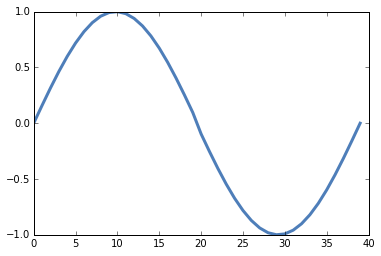

In [15]:
signal = thinkdsp.Sinusoid(freq=440)
wave = signal.make_wave(start=0, duration=1/440, framerate=17250)
arr = wave.ys[0:20]
reversed_arr = -arr[::-1]
wave.ys = np.concatenate([arr, reversed_arr])
thinkplot.plot(wave.ys)

Again, we start with the right-side of the equality. With two levels of detail, we start defining our $f_1(t)$ as our $f_2(t)$ function above. We separate the original sine wave into two segments and find the average of both segments, giving us $f_1(t)$. To find $f_2(t)$, we separate the segment into 4 segments, which is why the length of the ys array needed to be divisible by 4, and average each segment. Next, we subtract $f_1(t)$ from $f_2(t)$. Below is a depiction of this process.

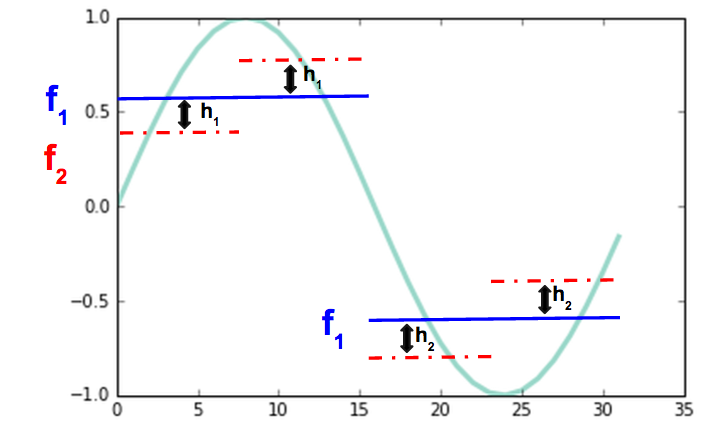

In [26]:
Image(filename='HWT_3.png')

Now we plot the left-hand side of the equality below.

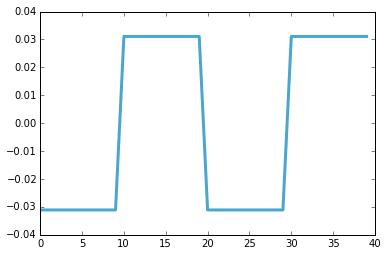

In [16]:
avg_div1 = np.mean(wave.ys[0:len(wave.ys)/2])  #f1
avg_div2 = np.mean(wave.ys[len(wave.ys)/2:len(wave.ys)]) 

ys1 = wave.ys[0:len(wave.ys)/4]
ys2 = wave.ys[len(wave.ys)/4:2*len(wave.ys)/4]
ys3 = wave.ys[2*len(wave.ys)/4:3*len(wave.ys)/4]
ys4 = wave.ys[3*len(wave.ys)/4:len(wave.ys)]

avg1 = np.mean(ys1) #f2
avg2 = np.mean(ys2)
avg3 = np.mean(ys3)
avg4 = np.mean(ys4)

h1 = avg1 - avg_div1 #f2 - f1
h2 = avg2 - avg_div1
h3 = avg3 - avg_div2
h4 = avg4 - avg_div2

left = np.concatenate([h1*np.ones(len(ys1)), h2*np.ones(len(ys2)), h3*np.ones(len(ys3)), h4*np.ones(len(ys4))])
#(f2 - f1)(t)
thinkplot.plot(left)

Now again, we will plot the right-hand side of the equality, that involves using the hs we calculated before. We know that h1=h2 and h3=h4 so we can just use h1 and h3. What is different from the previous example is that now we need two $\psi(t)$ functions that are dilated over the intervals from 0 to $\frac{T}{2}$ and from $\frac{T}{2}$ to T. So we add together $h1 \times \psi(\frac{t}{T/2})$ and $h3 \times \psi(\frac{t}{T/2} - T/2)$ and plot the result, which we expect to be the same as the previous plot.

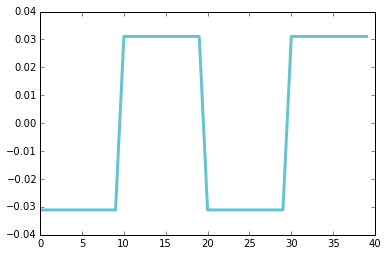

In [17]:
psi = np.concatenate([np.ones(len(wave.ys)/4),-np.ones(len(wave.ys)/4)])

right = np.concatenate([h1*psi, h3*psi])
thinkplot.plot(right)

Now, once again, to approximate the sine wave, we just add our $f_1(t)$ function over to the right-hand side of the equality and plot the result. We are proving that as we increase the levels of detail, we get a better approximation of the sine wave, which is plotted below. This approximation is better than the approximation with one level of detail.

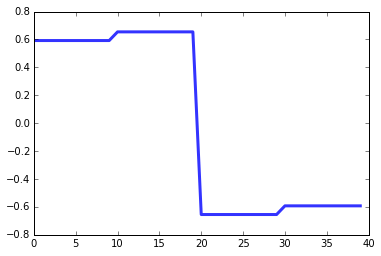

In [12]:
approx = ans + np.concatenate([avg_div1*np.ones(len(wave.ys)/2), avg_div2*np.ones(len(wave.ys)/2)])
thinkplot.plot(approx)